In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np


/var/folders/19/r56dh6d15dvbmqph7x4f4r3m0000gn/T/ipykernel_15297/1795173494.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [81]:
pm25_geo

,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_pm_pred,ds_pm_stdd,date_parsed,month,geometry
10645,2011,31DEC2011,6,6001,6001400100,37.86754,-122.23181,8.143539,4.009139,2011-12-31,12,POINT (-122.23181 37.86754)
10646,2011,31DEC2011,6,6001,6001400200,37.84817,-122.24948,8.116514,3.971881,2011-12-31,12,POINT (-122.24948 37.84817)
10647,2011,31DEC2011,6,6001,6001400300,37.84056,-122.25442,8.083649,3.933703,2011-12-31,12,POINT (-122.25442 37.84056)
10648,2011,31DEC2011,6,6001,6001400400,37.84801,-122.25752,8.180107,4.215300,2011-12-31,12,POINT (-122.25752 37.84801)
10649,2011,31DEC2011,6,6001,6001400500,37.84853,-122.26480,8.125882,4.103174,2011-12-31,12,POINT (-122.26480 37.84853)
...,...,...,...,...,...,...,...,...,...,...,...,...
105551860,2011,30DEC2011,6,6115,6115040800,39.03911,-121.43245,15.105626,5.095760,2011-12-30,12,POINT (-121.43245 39.03911)
105551861,2011,30DEC2011,6,6115,6115040901,39.14548,-121.40275,13.452446,4.664280,2011-12-30,12,POINT (-121.40275 39.14548)
105551862,2011,30DEC2011,6,6115,6115040902,39.12297,-121.39185,13.761356,5.036964,2011-12-30,12,POINT (-121.39185 39.12297)
105551863,2011,30DEC2011,6,6115,6115041000,39.26758,-121.44107,12.725073,4.810918,2011-12-30,12,POINT (-121.44107 39.26758)


First dataset for wildfires found here: https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436

In [2]:
fire_data = pd.read_csv('./California_Fire_Perimeters_5422071188818403882.csv')
display(fire_data)

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,...,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NAME,COMPLEX_INCNUM,IRWINID,FIRE_NUM,DECADES,Shape__Area,Shape__Length
0,21440,2020.0,CA,CDF,NEU,NELSON,00013212,6/18/2020 12:00:00 AM,6/23/2020 12:00:00 AM,11.0,...,1.0,109.602300,NaN,NaN,NaN,NaN,NaN,2020.0,7.331347e+05,4179.743142
1,21441,2020.0,CA,CDF,NEU,AMORUSO,00011799,6/1/2020 12:00:00 AM,6/4/2020 12:00:00 AM,2.0,...,1.0,685.585000,NaN,NaN,NaN,NaN,NaN,2020.0,4.578172e+06,12399.375391
2,21442,2020.0,CA,CDF,NEU,ATHENS,00018493,8/10/2020 12:00:00 AM,8/11/2020 12:00:00 AM,14.0,...,1.0,27.300480,NaN,NaN,NaN,NaN,NaN,2020.0,1.823876e+05,2119.194120
3,21443,2020.0,CA,CDF,NEU,FLEMING,00007619,3/31/2020 12:00:00 AM,4/1/2020 12:00:00 AM,9.0,...,1.0,12.931550,NaN,NaN,NaN,NaN,NaN,2020.0,8.667945e+04,2029.524881
4,21444,2020.0,CA,CDF,NEU,MELANESE,00008471,4/14/2020 12:00:00 AM,4/19/2020 12:00:00 AM,18.0,...,1.0,10.315960,NaN,NaN,NaN,NaN,NaN,2020.0,7.017913e+04,1342.742903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21921,43907,2022.0,CA,LRA,VNC,CHAMBERS,00023419,3/16/2022 12:00:00 AM,3/17/2022 12:00:00 AM,14.0,...,1.0,1.547286,NaN,NaN,NaN,B541FD2D-0474-47CF-AF6C-C4576E03A590,NaN,2020.0,9.217691e+03,537.691347
21922,43908,2022.0,CA,LRA,VNC,MOON,00073287,8/14/2022 12:00:00 AM,8/14/2022 12:00:00 AM,14.0,...,1.0,1.424808,NaN,NaN,NaN,EE538AD9-C557-40F2-9EDD-56C345B4E7FD,NaN,2020.0,8.444238e+03,452.799309
21923,43909,2022.0,CA,USF,SHF,TEXAS,00000953,9/9/2022 12:00:00 AM,9/10/2022 12:00:00 AM,14.0,...,1.0,12.912490,BA5FDCF1-23D0-43FD-8DA9-3FF21A5C0F81,NaN,NaN,BA5FDCF1-23D0-43FD-8DA9-3FF21A5C0F81,NaN,2020.0,8.985026e+04,2061.550880
21924,43910,2022.0,CA,USF,KNF,ALEX,00006290,7/31/2022 12:00:00 AM,8/3/2022 12:00:00 AM,14.0,...,1.0,150.403500,E9A30E52-C8E6-4AA5-B7D8-967923865340,NaN,NaN,E9A30E52-C8E6-4AA5-B7D8-967923865340,NaN,2020.0,1.100802e+06,6500.414625


In [3]:
fire_location = gpd.read_file('./fire_shape_data/California_Fire_Perimeters_(all).shp')
fire_location

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,C_METHOD,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NA,COMPLEX_IN,IRWINID,FIRE_NUM,DECADES,geometry
0,2020,CA,CDF,NEU,NELSON,00013212,2020-06-18,2020-06-23,11,1,1,109.60200,None,None,None,None,None,2020,"POLYGON ((-13508443.877 4705925.941, -13508437..."
1,2020,CA,CDF,NEU,AMORUSO,00011799,2020-06-01,2020-06-04,2,1,1,685.58500,None,None,None,None,None,2020,"POLYGON ((-13508927.937 4695976.336, -13508919..."
2,2020,CA,CDF,NEU,ATHENS,00018493,2020-08-10,2020-08-11,14,1,1,27.30050,None,None,None,None,None,2020,"POLYGON ((-13506766.482 4699576.903, -13506741..."
3,2020,CA,CDF,NEU,FLEMING,00007619,2020-03-31,2020-04-01,9,1,1,12.93150,None,None,None,None,None,2020,"POLYGON ((-13500068.676 4716384.732, -13500054..."
4,2020,CA,CDF,NEU,MELANESE,00008471,2020-04-14,2020-04-19,18,1,1,10.31600,None,None,None,None,None,2020,"POLYGON ((-13503128.528 4791692.607, -13503101..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21921,2022,CA,LRA,VNC,CHAMBERS,00023419,2022-03-16,2022-03-17,14,1,1,1.54729,None,None,None,B541FD2D-0474-47CF-AF6C-C4576E03A590,None,2020,"POLYGON ((-13237822.286 4081383.153, -13237822..."
21922,2022,CA,LRA,VNC,MOON,00073287,2022-08-14,2022-08-14,14,1,1,1.42481,None,None,None,EE538AD9-C557-40F2-9EDD-56C345B4E7FD,None,2020,"POLYGON ((-13241105.999 4051757.539, -13241098..."
21923,2022,CA,USF,SHF,TEXAS,00000953,2022-09-09,2022-09-10,14,6,1,12.91250,BA5FDCF1-23D0-43FD-8DA9-3FF21A5C0F81,None,None,BA5FDCF1-23D0-43FD-8DA9-3FF21A5C0F81,None,2020,"POLYGON ((-13703427.459 4905142.122, -13703465..."
21924,2022,CA,USF,KNF,ALEX,00006290,2022-07-31,2022-08-03,14,3,1,150.40400,E9A30E52-C8E6-4AA5-B7D8-967923865340,None,None,E9A30E52-C8E6-4AA5-B7D8-967923865340,None,2020,"MULTIPOLYGON (((-13687209.245 5152398.057, -13..."


In [4]:
print(len(fire_location["FIRE_NAME"]))
print(len(fire_location["FIRE_NAME"].unique()))
print(len(fire_data))

21926
9036
21926


In [5]:
print(str(fire_location["geometry"][0]))

POLYGON ((-13508443.8772 4705925.940700002, -13508437.8379 4705927.1696000025, -13508432.5098 4705928.6489999965, -13508425.6331 4705927.5942, -13508412.5327 4705926.491099998, -13508407.0184 4705920.868799999, -13508379.474 4705923.901799999, -13508375.554299999 4705922.965899996, -13508349.597199999 4705916.769000001, -13508335.955699999 4705915.666199997, -13508323.928399999 4705912.345700003, -13508305.407200001 4705915.054899998, -13508302.3279 4705912.968900003, -13508299.1929 4705912.081900001, -13508259.8919 4705911.782200001, -13508227.8504 4705918.351400003, -13508195.0158 4705910.391599998, -13508160.9214 4705912.369499996, -13508145.2926 4705907.298799999, -13508118.0374 4705889.964599997, -13508091.2863 4705881.944899999, -13508085.8466 4705876.598200001, -13508050.1008 4705861.865400001, -13508038.3534 4705862.860399999, -13508023.5361 4705857.417999998, -13507988.1356 4705842.217500001, -13507973.8504 4705829.174900003, -13507945.270399999 4705809.743100002, -13507911.93

In [6]:
merged_fire = pd.merge(fire_data, fire_location, left_index=True, right_index=True, suffixes=('', '_drop'))
merged_fire = merged_fire.filter(regex='^(?!.*_drop)')

print(merged_fire.columns)

Index(['OBJECTID', 'YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME',
       'INC_NUM', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'C_METHOD', 'OBJECTIVE',
       'GIS_ACRES', 'COMMENTS', 'COMPLEX_NAME', 'COMPLEX_INCNUM', 'IRWINID',
       'FIRE_NUM', 'DECADES', 'Shape__Area', 'Shape__Length', 'COMPLEX_NA',
       'COMPLEX_IN', 'geometry'],
      dtype='object')


In [7]:
merged_fire

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,...,COMPLEX_NAME,COMPLEX_INCNUM,IRWINID,FIRE_NUM,DECADES,Shape__Area,Shape__Length,COMPLEX_NA,COMPLEX_IN,geometry
0,21440,2020.0,CA,CDF,NEU,NELSON,00013212,6/18/2020 12:00:00 AM,6/23/2020 12:00:00 AM,11.0,...,NaN,NaN,NaN,NaN,2020.0,7.331347e+05,4179.743142,None,None,"POLYGON ((-13508443.877 4705925.941, -13508437..."
1,21441,2020.0,CA,CDF,NEU,AMORUSO,00011799,6/1/2020 12:00:00 AM,6/4/2020 12:00:00 AM,2.0,...,NaN,NaN,NaN,NaN,2020.0,4.578172e+06,12399.375391,None,None,"POLYGON ((-13508927.937 4695976.336, -13508919..."
2,21442,2020.0,CA,CDF,NEU,ATHENS,00018493,8/10/2020 12:00:00 AM,8/11/2020 12:00:00 AM,14.0,...,NaN,NaN,NaN,NaN,2020.0,1.823876e+05,2119.194120,None,None,"POLYGON ((-13506766.482 4699576.903, -13506741..."
3,21443,2020.0,CA,CDF,NEU,FLEMING,00007619,3/31/2020 12:00:00 AM,4/1/2020 12:00:00 AM,9.0,...,NaN,NaN,NaN,NaN,2020.0,8.667945e+04,2029.524881,None,None,"POLYGON ((-13500068.676 4716384.732, -13500054..."
4,21444,2020.0,CA,CDF,NEU,MELANESE,00008471,4/14/2020 12:00:00 AM,4/19/2020 12:00:00 AM,18.0,...,NaN,NaN,NaN,NaN,2020.0,7.017913e+04,1342.742903,None,None,"POLYGON ((-13503128.528 4791692.607, -13503101..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21921,43907,2022.0,CA,LRA,VNC,CHAMBERS,00023419,3/16/2022 12:00:00 AM,3/17/2022 12:00:00 AM,14.0,...,NaN,NaN,B541FD2D-0474-47CF-AF6C-C4576E03A590,NaN,2020.0,9.217691e+03,537.691347,None,None,"POLYGON ((-13237822.286 4081383.153, -13237822..."
21922,43908,2022.0,CA,LRA,VNC,MOON,00073287,8/14/2022 12:00:00 AM,8/14/2022 12:00:00 AM,14.0,...,NaN,NaN,EE538AD9-C557-40F2-9EDD-56C345B4E7FD,NaN,2020.0,8.444238e+03,452.799309,None,None,"POLYGON ((-13241105.999 4051757.539, -13241098..."
21923,43909,2022.0,CA,USF,SHF,TEXAS,00000953,9/9/2022 12:00:00 AM,9/10/2022 12:00:00 AM,14.0,...,NaN,NaN,BA5FDCF1-23D0-43FD-8DA9-3FF21A5C0F81,NaN,2020.0,8.985026e+04,2061.550880,None,None,"POLYGON ((-13703427.459 4905142.122, -13703465..."
21924,43910,2022.0,CA,USF,KNF,ALEX,00006290,7/31/2022 12:00:00 AM,8/3/2022 12:00:00 AM,14.0,...,NaN,NaN,E9A30E52-C8E6-4AA5-B7D8-967923865340,NaN,2020.0,1.100802e+06,6500.414625,None,None,"MULTIPOLYGON (((-13687209.245 5152398.057, -13..."


In [8]:
merged_fire.columns

Index(['OBJECTID', 'YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME',
       'INC_NUM', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'C_METHOD', 'OBJECTIVE',
       'GIS_ACRES', 'COMMENTS', 'COMPLEX_NAME', 'COMPLEX_INCNUM', 'IRWINID',
       'FIRE_NUM', 'DECADES', 'Shape__Area', 'Shape__Length', 'COMPLEX_NA',
       'COMPLEX_IN', 'geometry'],
      dtype='object')

In [9]:
len(merged_fire["FIRE_NUM"].unique())

3173

Second dataset for wildfires is found here: https://www.kaggle.com/datasets/ananthu017/california-wildfire-incidents-20132020?select=California_Fire_Incidents.csv

In [10]:
#second_fire = pd.read_csv("./California_Fire_Incidents.csv")
#display(second_fire)

In [11]:
#second_fire.columns

In [12]:
#second_fire["Name"]

In [13]:
#merged_fire["ALARM_DATE"]

In [14]:
merged_fire["YEAR_"].unique()

array([2020., 2007., 2006., 2005., 2004., 1944., 1915., 1917., 1960.,
       1921., 1923., 1970., 1920., 1979., 1990., 1998., 1966., 1942.,
       1941., 1982., 1973., 1977., 1953., 1946., 1955., 1931., 1949.,
       1964., 1948., 1958., 1972., 1916., 1974., 1950., 1930., 1971.,
       1924., 1926., 1927., 1945., 1952., 1911., 1929.,   nan, 1997.,
       1984., 1910., 1951., 1956., 1981., 1909., 1935., 1936., 1961.,
       1919., 1925., 1928., 1918., 1940., 1933., 1968., 1999., 1943.,
       1914., 1922., 1975., 1932., 1912., 1978., 1983., 1913., 1947.,
       1934., 1937., 1938., 1967., 1976., 2000., 1994., 1878., 1895.,
       1896., 1898., 1907., 1908., 1986., 1980., 1954., 1962., 1959.,
       1900., 1957., 2003., 1969., 1988., 1996., 1991., 1992., 1995.,
       1987., 1939., 1903., 1905., 1906., 1985., 2001., 1989., 2002.,
       1965., 1993., 1963., 2008., 2010., 2016., 2012., 2014., 1902.,
       2009., 2011., 2013., 2015., 2017., 2018., 2019., 2021., 2022.])

In [15]:
#second_fire["ArchiveYear"].unique()

Might not be worth using because only 2 years match with the pm2.5 dataset.

The third dataset can be found here: https://www.kaggle.com/datasets/avkashchauhan/california-wildfire-dataset-from-2000-2021/data

In [16]:
third_fire = pd.read_csv("./ca_daily_fire_2000_2021-v2.csv")
display(third_fire)

,latitude,longitude,acq_date,satellite,instrument,frp,type,bright_t31,confidence,year,month
0,32.4646,-114.6906,2011-06-29,Terra,MODIS,91.1,0,315.7,84,2011,6
1,32.4768,-114.6785,2011-10-11,Terra,MODIS,96.2,0,313.7,100,2011,10
2,32.4937,-114.7856,2013-02-06,Terra,MODIS,26.9,0,296.1,65,2013,2
3,32.4987,-114.7985,2010-02-04,Terra,MODIS,22.2,0,282.9,62,2010,2
4,32.5006,-114.7929,2009-07-08,Aqua,MODIS,172.0,0,316.4,78,2009,7
...,...,...,...,...,...,...,...,...,...,...,...
221178,41.9998,-121.0237,2014-11-12,Aqua,MODIS,24.6,0,274.4,77,2014,11
221179,41.9998,-120.7090,2012-08-13,Terra,MODIS,74.1,0,310.7,97,2012,8
221180,41.9998,-114.9167,2007-07-20,Aqua,MODIS,35.7,0,321.8,91,2007,7
221181,41.9999,-123.5675,2018-07-30,Terra,MODIS,18.2,0,295.8,62,2018,7


In [17]:
third_fire["year"].unique()

array([2011, 2013, 2010, 2009, 2004, 2002, 2018, 2007, 2005, 2008, 2014,
       2020, 2012, 2006, 2003, 2016, 2017, 2019, 2001, 2015, 2000])

In [18]:
third_fire.columns

Index(['latitude', 'longitude', 'acq_date', 'satellite', 'instrument', 'frp',
       'type', 'bright_t31', 'confidence', 'year', 'month'],
      dtype='object')

In [19]:
print(len(third_fire["acq_date"].unique()))
print(len(third_fire["acq_date"]))

6352
221183


In [20]:
merged_fire["ALARM_DATE"]

0        6/18/2020 12:00:00 AM
1         6/1/2020 12:00:00 AM
2        8/10/2020 12:00:00 AM
3        3/31/2020 12:00:00 AM
4        4/14/2020 12:00:00 AM
                 ...          
21921    3/16/2022 12:00:00 AM
21922    8/14/2022 12:00:00 AM
21923     9/9/2022 12:00:00 AM
21924    7/31/2022 12:00:00 AM
21925    7/25/2022 12:00:00 AM
Name: ALARM_DATE, Length: 21926, dtype: object

In [21]:
merged_fire["CONT_DATE"]

0        6/23/2020 12:00:00 AM
1         6/4/2020 12:00:00 AM
2        8/11/2020 12:00:00 AM
3         4/1/2020 12:00:00 AM
4        4/19/2020 12:00:00 AM
                 ...          
21921    3/17/2022 12:00:00 AM
21922    8/14/2022 12:00:00 AM
21923    9/10/2022 12:00:00 AM
21924     8/3/2022 12:00:00 AM
21925    7/25/2022 12:00:00 AM
Name: CONT_DATE, Length: 21926, dtype: object

In [22]:
merged_fire = merged_fire[(merged_fire["YEAR_"] >= 2011) & (merged_fire["YEAR_"] <= 2014)]
display(merged_fire)

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,...,COMPLEX_NAME,COMPLEX_INCNUM,IRWINID,FIRE_NUM,DECADES,Shape__Area,Shape__Length,COMPLEX_NA,COMPLEX_IN,geometry
13045,34584,2012.0,CA,CCO,KRN,COWBOY,01217096,6/7/2012 12:00:00 AM,6/7/2012 12:00:00 AM,14.0,...,NaN,NaN,NaN,NaN,2010.0,4.771871e+03,368.968754,None,None,"POLYGON ((-13187023.232 4218136.070, -13187021..."
13046,34585,2012.0,CA,CCO,KRN,EDMONSTON,01218758,6/22/2012 12:00:00 AM,6/22/2012 12:00:00 AM,14.0,...,NaN,NaN,NaN,NaN,2010.0,7.914763e+04,3795.868045,None,None,"POLYGON ((-13236016.851 4157998.099, -13236016..."
13047,34586,2012.0,CA,CCO,KRN,EMIGDIO,01219717,6/29/2012 12:00:00 AM,6/29/2012 12:00:00 AM,14.0,...,NaN,NaN,NaN,NaN,2010.0,1.045049e+06,4798.880579,None,None,"POLYGON ((-13270806.002 4151445.849, -13270803..."
13048,34587,2012.0,CA,CCO,KRN,GRAPEVINE,01218491,6/18/2012 12:00:00 AM,6/18/2012 12:00:00 AM,14.0,...,NaN,NaN,NaN,NaN,2010.0,1.243085e+06,7063.686729,None,None,"POLYGON ((-13235680.988 4152022.282, -13235684..."
13049,34588,2012.0,CA,CCO,KRN,HILL,01218764,6/21/2012 12:00:00 AM,6/21/2012 12:00:00 AM,14.0,...,NaN,NaN,NaN,NaN,2010.0,8.903725e+04,1720.608691,None,None,"POLYGON ((-13298018.729 4180906.215, -13297990..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20437,42038,2014.0,CA,USF,KNF,RIVER,01706227,5/2/2014 12:00:00 AM,5/12/2014 12:00:00 AM,9.0,...,NaN,NaN,NaN,NaN,2010.0,1.165393e+05,1594.570065,None,None,"POLYGON ((-13695613.479 5128308.782, -13695622..."
20438,42039,2014.0,CA,USF,KNF,ETHEL,00005977,8/12/2014 12:00:00 AM,9/15/2014 12:00:00 AM,1.0,...,NaN,NaN,NaN,NaN,2010.0,8.375946e+04,1159.420758,None,None,"POLYGON ((-13716181.541 5078091.421, -13716033..."
21162,42778,2013.0,CA,CCO,VNC,SPRINGS,NaN,5/2/2013 12:00:00 AM,5/11/2013 12:00:00 AM,14.0,...,NaN,NaN,NaN,NaN,2010.0,1.401817e+08,166629.804623,None,None,"MULTIPOLYGON (((-13249430.922 4049132.907, -13..."
21566,43189,2014.0,CA,USF,SHF,COFFEE,00002410,7/29/2014 12:00:00 AM,10/30/2014 12:00:00 AM,1.0,...,COFFEE COMPLEX,NaN,NaN,NaN,2010.0,4.469850e+07,37130.571134,COFFEE COMPLEX,None,"POLYGON ((-13672617.853 5040221.726, -13672487..."


In [23]:
third_fire = third_fire[(third_fire["year"] >= 2011) & (third_fire["year"] <= 2014)]
display(third_fire)

,latitude,longitude,acq_date,satellite,instrument,frp,type,bright_t31,confidence,year,month
0,32.4646,-114.6906,2011-06-29,Terra,MODIS,91.1,0,315.7,84,2011,6
1,32.4768,-114.6785,2011-10-11,Terra,MODIS,96.2,0,313.7,100,2011,10
2,32.4937,-114.7856,2013-02-06,Terra,MODIS,26.9,0,296.1,65,2013,2
5,32.5006,-114.7917,2013-02-06,Terra,MODIS,45.0,0,296.4,74,2013,2
13,32.5167,-114.7978,2011-11-05,Terra,MODIS,8.2,0,295.7,65,2011,11
...,...,...,...,...,...,...,...,...,...,...,...
221166,41.9994,-120.0259,2014-10-28,Terra,MODIS,57.3,0,285.6,62,2014,10
221171,41.9995,-120.6710,2012-08-14,Aqua,MODIS,227.1,0,309.3,100,2012,8
221176,41.9996,-120.6638,2012-08-14,Terra,MODIS,1717.1,0,364.8,100,2012,8
221178,41.9998,-121.0237,2014-11-12,Aqua,MODIS,24.6,0,274.4,77,2014,11


In [24]:
# Convert merged_fire to a GeoDataFrame
merged_fire_geo = gpd.GeoDataFrame(merged_fire, geometry='geometry')

merged_fire_geo.crs = {'init': 'epsg:3857'}
merged_fire_geo = merged_fire_geo.to_crs({'init': 'epsg:4326'})
merged_fire_geo['latitude'] = merged_fire_geo.centroid.y
merged_fire_geo['longitude'] = merged_fire_geo.centroid.x

# Convert third_fire to a GeoDataFrame
third_fire_geo = gpd.GeoDataFrame(third_fire, geometry=gpd.points_from_xy(third_fire['longitude'], third_fire['latitude']))

# Set the coordinate reference system (CRS) for both GeoDataFrames
merged_fire_geo.crs = {'init': 'epsg:4326'}
third_fire_geo.crs = {'init': 'epsg:4326'}

/opt/homebrew/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/homebrew/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/19/r56dh6d15dvbmqph7x4f4r3m0000gn/T/ipykernel_15297/1143485156.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometr

In [49]:
merged_fire_geo

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,...,IRWINID,FIRE_NUM,DECADES,Shape__Area,Shape__Length,COMPLEX_NA,COMPLEX_IN,geometry,latitude,longitude
13045,34584,2012.0,CA,CCO,KRN,COWBOY,01217096,2012-06-07,2012-06-07,14.0,...,NaN,NaN,2010.0,4.771871e+03,368.968754,None,None,"POLYGON ((-118.46105 35.39826, -118.46103 35.3...",35.398075,-118.460940
13046,34585,2012.0,CA,CCO,KRN,EDMONSTON,01218758,2012-06-22,2012-06-22,14.0,...,NaN,NaN,2010.0,7.914763e+04,3795.868045,None,None,"POLYGON ((-118.90116 34.95670, -118.90116 34.9...",34.953109,-118.898142
13047,34586,2012.0,CA,CCO,KRN,EMIGDIO,01219717,2012-06-29,2012-06-29,14.0,...,NaN,NaN,2010.0,1.045049e+06,4798.880579,None,None,"POLYGON ((-119.21368 34.90844, -119.21365 34.9...",34.906434,-119.209424
13048,34587,2012.0,CA,CCO,KRN,GRAPEVINE,01218491,2012-06-18,2012-06-18,14.0,...,NaN,NaN,2010.0,1.243085e+06,7063.686729,None,None,"POLYGON ((-118.89815 34.91269, -118.89817 34.9...",34.908048,-118.893613
13049,34588,2012.0,CA,CCO,KRN,HILL,01218764,2012-06-21,2012-06-21,14.0,...,NaN,NaN,2010.0,8.903725e+04,1720.608691,None,None,"POLYGON ((-119.45813 35.12518, -119.45788 35.1...",35.123764,-119.459344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20437,42038,2014.0,CA,USF,KNF,RIVER,01706227,2014-05-02,2014-05-12,9.0,...,NaN,NaN,2010.0,1.165393e+05,1594.570065,None,None,"POLYGON ((-123.02979 41.78152, -123.02987 41.7...",41.780934,-123.027870
20438,42039,2014.0,CA,USF,KNF,ETHEL,00005977,2014-08-12,2014-09-15,1.0,...,NaN,NaN,2010.0,8.375946e+04,1159.420758,None,None,"POLYGON ((-123.21456 41.44425, -123.21322 41.4...",41.444664,-123.212820
21162,42778,2013.0,CA,CCO,VNC,SPRINGS,NaN,2013-05-02,2013-05-11,14.0,...,NaN,NaN,2010.0,1.401817e+08,166629.804623,None,None,"MULTIPOLYGON (((-119.02166 34.15128, -119.0219...",34.128425,-119.009099
21566,43189,2014.0,CA,USF,SHF,COFFEE,00002410,2014-07-29,2014-10-30,1.0,...,NaN,NaN,2010.0,4.469850e+07,37130.571134,COFFEE COMPLEX,None,"POLYGON ((-122.82322 41.18875, -122.82205 41.1...",41.153162,-122.823041


In [26]:
third_fire_geo

,latitude,longitude,acq_date,satellite,instrument,frp,type,bright_t31,confidence,year,month,geometry
0,32.4646,-114.6906,2011-06-29,Terra,MODIS,91.1,0,315.7,84,2011,6,POINT (-114.69060 32.46460)
1,32.4768,-114.6785,2011-10-11,Terra,MODIS,96.2,0,313.7,100,2011,10,POINT (-114.67850 32.47680)
2,32.4937,-114.7856,2013-02-06,Terra,MODIS,26.9,0,296.1,65,2013,2,POINT (-114.78560 32.49370)
5,32.5006,-114.7917,2013-02-06,Terra,MODIS,45.0,0,296.4,74,2013,2,POINT (-114.79170 32.50060)
13,32.5167,-114.7978,2011-11-05,Terra,MODIS,8.2,0,295.7,65,2011,11,POINT (-114.79780 32.51670)
...,...,...,...,...,...,...,...,...,...,...,...,...
221166,41.9994,-120.0259,2014-10-28,Terra,MODIS,57.3,0,285.6,62,2014,10,POINT (-120.02590 41.99940)
221171,41.9995,-120.6710,2012-08-14,Aqua,MODIS,227.1,0,309.3,100,2012,8,POINT (-120.67100 41.99950)
221176,41.9996,-120.6638,2012-08-14,Terra,MODIS,1717.1,0,364.8,100,2012,8,POINT (-120.66380 41.99960)
221178,41.9998,-121.0237,2014-11-12,Aqua,MODIS,24.6,0,274.4,77,2014,11,POINT (-121.02370 41.99980)


In [27]:
# Convert 'ALARM_DATE', 'CONT_DATE', and 'acq_date' to datetime if not already
merged_fire_geo['ALARM_DATE'] = pd.to_datetime(merged_fire_geo['ALARM_DATE'], errors='coerce')
merged_fire_geo['CONT_DATE'] = pd.to_datetime(merged_fire_geo['CONT_DATE'], errors='coerce')
third_fire_geo['acq_date'] = pd.to_datetime(third_fire_geo['acq_date'])

# Perform the spatial join with a distance tolerance
distance_tolerance = 10  # Adjust the distance tolerance as needed (in degrees)
merged_df = gpd.sjoin_nearest(merged_fire_geo, third_fire_geo, how='inner', distance_col='distance')
merged_df.columns()

/var/folders/19/r56dh6d15dvbmqph7x4f4r3m0000gn/T/ipykernel_15297/3313080174.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_fire_geo['ALARM_DATE'] = pd.to_datetime(merged_fire_geo['ALARM_DATE'], errors='coerce')
/var/folders/19/r56dh6d15dvbmqph7x4f4r3m0000gn/T/ipykernel_15297/3313080174.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_fire_geo['CONT_DATE'] = pd.to_datetime(merged_fire_geo['CONT_DATE'], errors='coerce')
/opt/homebrew/lib/python3.11/site-packages/geopandas/array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,...,acq_date,satellite,instrument,frp,type,bright_t31,confidence,year,month,distance
13045,34584,2012.0,CA,CCO,KRN,COWBOY,01217096,2012-06-07,2012-06-07,14.0,...,2011-11-17,Aqua,MODIS,263.2,0,283.1,87,2011,11,0.075775
13046,34585,2012.0,CA,CCO,KRN,EDMONSTON,01218758,2012-06-22,2012-06-22,14.0,...,2012-06-03,Terra,MODIS,23.1,0,320.8,76,2012,6,0.027138
13047,34586,2012.0,CA,CCO,KRN,EMIGDIO,01219717,2012-06-29,2012-06-29,14.0,...,2012-02-22,Aqua,MODIS,9.9,0,303.2,52,2012,2,0.158773
13048,34587,2012.0,CA,CCO,KRN,GRAPEVINE,01218491,2012-06-18,2012-06-18,14.0,...,2012-06-19,Terra,MODIS,58.9,0,312.4,97,2012,6,0.000197
13049,34588,2012.0,CA,CCO,KRN,HILL,01218764,2012-06-21,2012-06-21,14.0,...,2012-03-24,Terra,MODIS,16.2,0,305.8,79,2012,3,0.100172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21567,43190,2012.0,CA,USF,KNF,HELLO,00005659,2012-08-05,2012-10-01,1.0,...,2012-08-12,Aqua,MODIS,40.6,0,306.8,88,2012,8,0.000000
21567,43190,2012.0,CA,USF,KNF,HELLO,00005659,2012-08-05,2012-10-01,1.0,...,2012-08-14,Aqua,MODIS,6.5,0,291.0,56,2012,8,0.000000
21567,43190,2012.0,CA,USF,KNF,HELLO,00005659,2012-08-05,2012-10-01,1.0,...,2012-08-12,Terra,MODIS,16.5,0,294.5,97,2012,8,0.000000
21567,43190,2012.0,CA,USF,KNF,HELLO,00005659,2012-08-05,2012-10-01,1.0,...,2012-08-12,Aqua,MODIS,23.1,0,294.7,100,2012,8,0.000000


In [82]:
len(merged_df)

16695

In [83]:
timed_df = merged_df[
                      (merged_df['acq_date'] >= merged_df['ALARM_DATE']) &
                      (merged_df['acq_date'] <= merged_df['CONT_DATE'])]
# Print the merged DataFrame
timed_df.columns

Index(['OBJECTID', 'YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME',
       'INC_NUM', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'C_METHOD', 'OBJECTIVE',
       'GIS_ACRES', 'COMMENTS', 'COMPLEX_NAME', 'COMPLEX_INCNUM', 'IRWINID',
       'FIRE_NUM', 'DECADES', 'Shape__Area', 'Shape__Length', 'COMPLEX_NA',
       'COMPLEX_IN', 'geometry', 'latitude_left', 'longitude_left',
       'index_right', 'latitude_right', 'longitude_right', 'acq_date',
       'satellite', 'instrument', 'frp', 'type', 'bright_t31', 'confidence',
       'year', 'month', 'distance'],
      dtype='object')

In [108]:
timed_df

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,...,acq_date,satellite,instrument,frp,type,bright_t31,confidence,year,month,distance
13056,34595,2012.0,CA,CCO,KRN,LAVAL,01216604,2012-06-03,2012-06-03,14.0,...,2012-06-03,Terra,MODIS,23.1,0,320.8,76,2012,6,0.000216
13063,34602,2012.0,CA,CCO,KRN,SAND,01222306,2012-07-17,2012-07-17,14.0,...,2012-07-17,Aqua,MODIS,226.5,0,322.3,100,2012,7,0.000000
13065,34604,2012.0,CA,CCO,KRN,SOUTH,01223744,2012-07-29,2012-08-01,14.0,...,2012-07-29,Aqua,MODIS,292.7,0,322.5,100,2012,7,0.000000
17235,38813,2011.0,CA,CDF,AEU,GROOVY,00027965,2011-12-01,2011-12-01,5.0,...,2011-12-01,Terra,MODIS,11.2,0,278.8,53,2011,12,0.002170
17239,38817,2011.0,CA,USF,ANF,MINT,00004967,2011-09-17,2011-09-19,9.0,...,2011-09-17,Aqua,MODIS,249.0,0,313.9,100,2011,9,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21567,43190,2012.0,CA,USF,KNF,HELLO,00005659,2012-08-05,2012-10-01,1.0,...,2012-08-12,Aqua,MODIS,40.6,0,306.8,88,2012,8,0.000000
21567,43190,2012.0,CA,USF,KNF,HELLO,00005659,2012-08-05,2012-10-01,1.0,...,2012-08-14,Aqua,MODIS,6.5,0,291.0,56,2012,8,0.000000
21567,43190,2012.0,CA,USF,KNF,HELLO,00005659,2012-08-05,2012-10-01,1.0,...,2012-08-12,Terra,MODIS,16.5,0,294.5,97,2012,8,0.000000
21567,43190,2012.0,CA,USF,KNF,HELLO,00005659,2012-08-05,2012-10-01,1.0,...,2012-08-12,Aqua,MODIS,23.1,0,294.7,100,2012,8,0.000000


In [30]:
pm = pd.read_csv("./Daily_Census_Tract-Level_PM2.5_Concentrations__2011-2014_20240413.csv")
pm_cali = pm[pm["statefips"]== 6]
pm_cali['date_parsed'] = pd.to_datetime(pm_cali['date'], format='%d%b%Y')
pm_cali['month'] = pm_cali['date_parsed'].dt.month
pm_cali.head()

/var/folders/19/r56dh6d15dvbmqph7x4f4r3m0000gn/T/ipykernel_15297/1627033057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm_cali['date_parsed'] = pd.to_datetime(pm_cali['date'], format='%d%b%Y')
/var/folders/19/r56dh6d15dvbmqph7x4f4r3m0000gn/T/ipykernel_15297/1627033057.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm_cali['month'] = pm_cali['date_parsed'].dt.month


,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_pm_pred,ds_pm_stdd,date_parsed,month
10645,2011,31DEC2011,6,6001,6001400100,37.86754,-122.23181,8.143539,4.009139,2011-12-31,12
10646,2011,31DEC2011,6,6001,6001400200,37.84817,-122.24948,8.116514,3.971881,2011-12-31,12
10647,2011,31DEC2011,6,6001,6001400300,37.84056,-122.25442,8.083649,3.933703,2011-12-31,12
10648,2011,31DEC2011,6,6001,6001400400,37.84801,-122.25752,8.180107,4.215300,2011-12-31,12
10649,2011,31DEC2011,6,6001,6001400500,37.84853,-122.26480,8.125882,4.103174,2011-12-31,12


In [31]:
len(pm_cali)

11746440

In [32]:
pm_cali.columns

Index(['year', 'date', 'statefips', 'countyfips', 'ctfips', 'latitude',
       'longitude', 'ds_pm_pred', 'ds_pm_stdd', 'date_parsed', 'month'],
      dtype='object')

In [33]:
pm25_geo = gpd.GeoDataFrame(pm_cali, geometry=gpd.points_from_xy(pm_cali['longitude'], pm_cali['latitude']))

pm25_geo.crs = {'init': 'epsg:4326'}
pm25_geo = pm25_geo.rename(columns={'index_left': 'index_left_pm25', 'index_right': 'index_right_pm25'})

timed_df = timed_df.rename(columns={'index_left': 'index_left_fire', 'index_right': 'index_right_fire'})

/opt/homebrew/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [34]:
timed_df.columns

Index(['OBJECTID', 'YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME',
       'INC_NUM', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'C_METHOD', 'OBJECTIVE',
       'GIS_ACRES', 'COMMENTS', 'COMPLEX_NAME', 'COMPLEX_INCNUM', 'IRWINID',
       'FIRE_NUM', 'DECADES', 'Shape__Area', 'Shape__Length', 'COMPLEX_NA',
       'COMPLEX_IN', 'geometry', 'latitude_left', 'longitude_left',
       'index_right_fire', 'latitude_right', 'longitude_right', 'acq_date',
       'satellite', 'instrument', 'frp', 'type', 'bright_t31', 'confidence',
       'year', 'month', 'distance'],
      dtype='object')

In [36]:
timed_df.columns

Index(['OBJECTID', 'YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME',
       'INC_NUM', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'C_METHOD', 'OBJECTIVE',
       'GIS_ACRES', 'COMMENTS', 'COMPLEX_NAME', 'COMPLEX_INCNUM', 'IRWINID',
       'FIRE_NUM', 'DECADES', 'Shape__Area', 'Shape__Length', 'COMPLEX_NA',
       'COMPLEX_IN', 'geometry', 'latitude_left', 'longitude_left',
       'index_right_fire', 'latitude_right', 'longitude_right', 'acq_date',
       'satellite', 'instrument', 'frp', 'type', 'bright_t31', 'confidence',
       'year', 'month', 'distance'],
      dtype='object')

In [39]:
timed_df = timed_df.reset_index(drop=True, inplace=False)
timed_df_2011 = timed_df[timed_df['year']==2011]

pm25_geo_2011 = pm25_geo[pm25_geo['year']==2011]
pm25_geo_2011.shape, timed_df_2011.shape

((2934600, 12), (614, 39))

In [41]:
from scipy.spatial.distance import cdist

chunk_size = 10000

merged_chunks = []

for start in range(0, len(timed_df_2011), chunk_size):
    end = start + chunk_size
    timed_chunk = timed_df_2011.iloc[start:end]
    
    merged_temp = pd.merge(timed_chunk, pm25_geo_2011, on='month', how='left')
    
    merged_temp['location_left'] = list(zip(merged_temp['latitude_right'], merged_temp['longitude_right']))
    merged_temp['location_right'] = list(zip(merged_temp['latitude'], merged_temp['longitude']))
    distances = cdist(merged_temp['location_left'].tolist(), merged_temp['location_right'].tolist(), metric='euclidean')
    
    distances_df = pd.DataFrame(distances.min(axis=1), columns=['distance'])
    
    merged_chunk = pd.merge_asof(merged_temp, distances_df, left_on='distance', right_on='distance', direction='nearest')
    
    merged_chunks.append(merged_chunk)

merged_df = pd.concat(merged_chunks, ignore_index=True)

merged_df = merged_df.drop(columns=['location_left', 'location_right', 'distance'])


: 

: 

In [79]:
from scipy.spatial.distance import cdist
# Step 1: Merge small_time and small_pm on 'year' and 'month'
merged_temp = pd.merge(timed_df_2011, pm25_geo_2011, on=['month'], how='left')

merged_temp['location_left'] = list(zip(merged_temp['latitude_right'], merged_temp['longitude_right']))
merged_temp['location_right'] = list(zip(merged_temp['latitude'], merged_temp['longitude']))
merged_temp['distance'] = np.sqrt((merged_temp['latitude'] - merged_temp['latitude_right'])**2 + 
                                  (merged_temp['longitude'] - merged_temp['longitude_right'])**2)

merged_temp[0]

#merged_timeloc = pd.merge_asof(merged_temp, distances_df, left_on='distance', right_on='distance', direction='nearest')
#merged_timeloc = merged_timeloc.drop(columns=['location_left', 'location_right', 'distance'])

NameError: name 'timed_df_2011' is not defined

In [85]:
from scipy.spatial import KDTree

# We are using the KDTrees in order to create spatial indexing
pm_coords = pm25_geo[['latitude', 'longitude']].values
wildfire_coords = timed_df[['latitude_right', 'longitude_right']].values

pm_tree = KDTree(pm_coords)
wildfire_tree = KDTree(wildfire_coords)

# Find the nearest wildfire for each PM2.5 observation
distances, wildfire_indices = pm_tree.query(wildfire_coords)

nearest_wildfire_map = dict(zip(wildfire_indices, range(len(wildfire_indices))))

pm25_geo['nearest_wildfire_idx'] = pm25_geo.index.map(nearest_wildfire_map)

merged_data = pd.merge(pm25_geo, timed_df, left_on='nearest_wildfire_idx', right_index=True, how='left')

In [87]:
merged_data.head()

,year_x,date,statefips,countyfips,ctfips,latitude,longitude,ds_pm_pred,ds_pm_stdd,date_parsed,...,acq_date,satellite,instrument,frp,type,bright_t31,confidence,year_y,month_y,distance
10645,2011,31DEC2011,6,6001,6001400100,37.86754,-122.23181,8.143539,4.009139,2011-12-31,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10646,2011,31DEC2011,6,6001,6001400200,37.84817,-122.24948,8.116514,3.971881,2011-12-31,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10647,2011,31DEC2011,6,6001,6001400300,37.84056,-122.25442,8.083649,3.933703,2011-12-31,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10648,2011,31DEC2011,6,6001,6001400400,37.84801,-122.25752,8.180107,4.215300,2011-12-31,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10649,2011,31DEC2011,6,6001,6001400500,37.84853,-122.26480,8.125882,4.103174,2011-12-31,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
merged_data.to_csv("merged_full.csv")

In [36]:
pm_cali_avg = pm_cali.groupby(['year', 'month', 'countyfips'])['ds_pm_pred'].mean()

pm_cali_avg = pm_cali_avg.reset_index()

print(pm_cali_avg)

      year  month  countyfips  ds_pm_pred
0     2011      1        6001   15.701924
1     2011      1        6003    9.284935
2     2011      1        6005   11.603251
3     2011      1        6007   12.687578
4     2011      1        6009   11.416407
...    ...    ...         ...         ...
2779  2014     12        6107   15.179392
2780  2014     12        6109    6.890244
2781  2014     12        6111    6.820678
2782  2014     12        6113    9.713120
2783  2014     12        6115    7.805436

[2784 rows x 4 columns]


In [44]:
timed_df.columns

Index(['OBJECTID', 'YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME',
       'INC_NUM', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'C_METHOD', 'OBJECTIVE',
       'GIS_ACRES', 'COMMENTS', 'COMPLEX_NAME', 'COMPLEX_INCNUM', 'IRWINID',
       'FIRE_NUM', 'DECADES', 'Shape__Area', 'Shape__Length', 'COMPLEX_NA',
       'COMPLEX_IN', 'geometry', 'latitude_left', 'longitude_left',
       'index_right_fire', 'latitude_right', 'longitude_right', 'acq_date',
       'satellite', 'instrument', 'frp', 'type', 'bright_t31', 'confidence',
       'year', 'month', 'distance'],
      dtype='object')

In [48]:
counties = gpd.read_file("./California_County_Boundaries_8408091426384550881/cnty19_1.shp")
counties.head()

,COUNTY_NAM,COUNTY_ABB,COUNTY_NUM,COUNTY_COD,COUNTY_FIP,ISLAND,GlobalID,geometry
0,Alameda,ALA,1,01,001,None,e6f92268-d2dd-4cfb-8b79-5b4b2f07c559,"POLYGON ((-13611173.233 4566017.932, -13611101..."
1,Alpine,ALP,2,02,003,None,870479b2-480a-494b-8352-ad60578839c1,"POLYGON ((-13312326.921 4680816.110, -13314594..."
2,Amador,AMA,3,03,005,None,4f45b3a6-be10-461c-8945-6b2aaa7119f6,"POLYGON ((-13366405.546 4679183.529, -13366428..."
3,Butte,BUT,4,04,007,None,44fba680-aecc-4e04-a499-29d69affbd4a,"POLYGON ((-13478186.664 4807593.081, -13478185..."
4,Calaveras,CAL,5,05,009,None,d11ef739-4a1e-414e-bfd1-e7dcd56cd61e,"POLYGON ((-13360333.217 4641182.754, -13361541..."


In [53]:
from shapely.geometry import Point

counties = counties.to_crs("EPSG:4326")

gdf = gpd.GeoDataFrame(
    timed_df, 
    geometry=[Point(xy) for xy in zip(timed_df.longitude_right, timed_df.latitude_right)],
    crs="EPSG:4326"  # Make sure to use the right Coordinate Reference System
)

if 'index_left' in gdf.columns or 'index_right' in gdf.columns:
    gdf.rename(columns={'index_left': 'index_left_old', 'index_right': 'index_right_old'}, inplace=True)
    
gdf = gpd.sjoin(gdf, counties, how="left", predicate='intersects')



,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,...,month,distance,index_right,COUNTY_NAM,COUNTY_ABB,COUNTY_NUM,COUNTY_COD,COUNTY_FIP,ISLAND,GlobalID
13056,34595,2012.0,CA,CCO,KRN,LAVAL,01216604,2012-06-03,2012-06-03,14.0,...,6,0.000216,14.0,Kern,KER,15.0,15,029,None,55f8678b-d6c9-40c4-b9a0-c3e73d2714a5
13063,34602,2012.0,CA,CCO,KRN,SAND,01222306,2012-07-17,2012-07-17,14.0,...,7,0.000000,14.0,Kern,KER,15.0,15,029,None,55f8678b-d6c9-40c4-b9a0-c3e73d2714a5
13065,34604,2012.0,CA,CCO,KRN,SOUTH,01223744,2012-07-29,2012-08-01,14.0,...,7,0.000000,14.0,Kern,KER,15.0,15,029,None,55f8678b-d6c9-40c4-b9a0-c3e73d2714a5
17235,38813,2011.0,CA,CDF,AEU,GROOVY,00027965,2011-12-01,2011-12-01,5.0,...,12,0.002170,8.0,El Dorado,ELD,9.0,09,017,None,8c7709f7-3e81-4245-85d6-3fbc6ebd7261
17239,38817,2011.0,CA,USF,ANF,MINT,00004967,2011-09-17,2011-09-19,9.0,...,9,0.000000,18.0,Los Angeles,LOS,19.0,19,037,None,3b1e1d69-2b1a-464d-ba43-611c4201b219


In [77]:
gdf.to_csv('merged_average.csv', index=False)

In [89]:
gdf.shape

(15312, 47)

In [66]:
gdf['COUNTY_FIP'] = pd.to_numeric(gdf['COUNTY_FIP'], errors='coerce')
gdf.columns

Index(['OBJECTID', 'YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME',
       'INC_NUM', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'C_METHOD', 'OBJECTIVE',
       'GIS_ACRES', 'COMMENTS', 'COMPLEX_NAME', 'COMPLEX_INCNUM', 'IRWINID',
       'FIRE_NUM', 'DECADES', 'Shape__Area', 'Shape__Length', 'COMPLEX_NA',
       'COMPLEX_IN', 'geometry', 'latitude_left', 'longitude_left',
       'index_right_old', 'latitude_right', 'longitude_right', 'acq_date',
       'satellite', 'instrument', 'frp', 'type', 'bright_t31', 'confidence',
       'year', 'month', 'distance', 'index_right', 'COUNTY_NAM', 'COUNTY_ABB',
       'COUNTY_NUM', 'COUNTY_COD', 'COUNTY_FIP', 'ISLAND', 'GlobalID'],
      dtype='object')

In [58]:
pm_cali_avg['standard_fips'] = pm_cali_avg["countyfips"]-6000
pm_cali_avg

,year,month,countyfips,ds_pm_pred,standard_fips
0,2011,1,6001,15.701924,1
1,2011,1,6003,9.284935,3
2,2011,1,6005,11.603251,5
3,2011,1,6007,12.687578,7
4,2011,1,6009,11.416407,9
...,...,...,...,...,...
2779,2014,12,6107,15.179392,107
2780,2014,12,6109,6.890244,109
2781,2014,12,6111,6.820678,111
2782,2014,12,6113,9.713120,113


In [103]:
gdf.columns

Index(['OBJECTID', 'YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME',
       'INC_NUM', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'C_METHOD', 'OBJECTIVE',
       'GIS_ACRES', 'COMMENTS', 'COMPLEX_NAME', 'COMPLEX_INCNUM', 'IRWINID',
       'FIRE_NUM', 'DECADES', 'Shape__Area', 'Shape__Length', 'COMPLEX_NA',
       'COMPLEX_IN', 'geometry', 'latitude_left', 'longitude_left',
       'index_right_old', 'latitude_right', 'longitude_right', 'acq_date',
       'satellite', 'instrument', 'frp', 'type', 'bright_t31', 'confidence',
       'year', 'month', 'distance', 'index_right', 'COUNTY_NAM', 'COUNTY_ABB',
       'COUNTY_NUM', 'COUNTY_COD', 'COUNTY_FIP', 'ISLAND', 'GlobalID'],
      dtype='object')

In [70]:
timed_avg = gdf.groupby(['year', 'month', 'COUNTY_FIP'])[["GIS_ACRES",'Shape__Area', 'Shape__Length', 'frp', 'bright_t31']].mean()
timed_avg = gdf.reset_index()
timed_avg.rename(columns={'COUNTY_FIP': 'countyfip'}, inplace=True)
pm_cali_avg.rename(columns={'standard_fips': 'countyfip'}, inplace=True)


In [75]:
merged_avg = pd.merge(timed_avg, pm_cali_avg, on=['year', 'month', 'countyfip'], how='inner')
merged_avg

,index,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,...,index_right,COUNTY_NAM,COUNTY_ABB,COUNTY_NUM,COUNTY_COD,countyfip,ISLAND,GlobalID,countyfips,ds_pm_pred
0,13056,34595,2012.0,CA,CCO,KRN,LAVAL,01216604,2012-06-03,2012-06-03,...,14.0,Kern,KER,15.0,15,29.0,None,55f8678b-d6c9-40c4-b9a0-c3e73d2714a5,6029,6.859310
1,13063,34602,2012.0,CA,CCO,KRN,SAND,01222306,2012-07-17,2012-07-17,...,14.0,Kern,KER,15.0,15,29.0,None,55f8678b-d6c9-40c4-b9a0-c3e73d2714a5,6029,8.548994
2,13065,34604,2012.0,CA,CCO,KRN,SOUTH,01223744,2012-07-29,2012-08-01,...,14.0,Kern,KER,15.0,15,29.0,None,55f8678b-d6c9-40c4-b9a0-c3e73d2714a5,6029,8.548994
3,17235,38813,2011.0,CA,CDF,AEU,GROOVY,00027965,2011-12-01,2011-12-01,...,8.0,El Dorado,ELD,9.0,09,17.0,None,8c7709f7-3e81-4245-85d6-3fbc6ebd7261,6017,14.229152
4,17239,38817,2011.0,CA,USF,ANF,MINT,00004967,2011-09-17,2011-09-19,...,18.0,Los Angeles,LOS,19.0,19,37.0,None,3b1e1d69-2b1a-464d-ba43-611c4201b219,6037,14.111780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15162,21567,43190,2012.0,CA,USF,KNF,HELLO,00005659,2012-08-05,2012-10-01,...,46.0,Siskiyou,SIS,47.0,47,93.0,None,79363538-fd2d-4ccd-8370-d3d130c54777,6093,10.655921
15163,21567,43190,2012.0,CA,USF,KNF,HELLO,00005659,2012-08-05,2012-10-01,...,46.0,Siskiyou,SIS,47.0,47,93.0,None,79363538-fd2d-4ccd-8370-d3d130c54777,6093,10.655921
15164,21567,43190,2012.0,CA,USF,KNF,HELLO,00005659,2012-08-05,2012-10-01,...,46.0,Siskiyou,SIS,47.0,47,93.0,None,79363538-fd2d-4ccd-8370-d3d130c54777,6093,10.655921
15165,21567,43190,2012.0,CA,USF,KNF,HELLO,00005659,2012-08-05,2012-10-01,...,46.0,Siskiyou,SIS,47.0,47,93.0,None,79363538-fd2d-4ccd-8370-d3d130c54777,6093,10.655921


In [91]:
gdf.columns

Index(['OBJECTID', 'YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME',
       'INC_NUM', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'C_METHOD', 'OBJECTIVE',
       'GIS_ACRES', 'COMMENTS', 'COMPLEX_NAME', 'COMPLEX_INCNUM', 'IRWINID',
       'FIRE_NUM', 'DECADES', 'Shape__Area', 'Shape__Length', 'COMPLEX_NA',
       'COMPLEX_IN', 'geometry', 'latitude_left', 'longitude_left',
       'index_right_old', 'latitude_right', 'longitude_right', 'acq_date',
       'satellite', 'instrument', 'frp', 'type', 'bright_t31', 'confidence',
       'year', 'month', 'distance', 'index_right', 'COUNTY_NAM', 'COUNTY_ABB',
       'COUNTY_NUM', 'COUNTY_COD', 'COUNTY_FIP', 'ISLAND', 'GlobalID'],
      dtype='object')

In [98]:
print("Length of X:", len(X))
print("Length of y:", len(y))

Length of X: 15312
Length of y: 2784


In [99]:
timed_avg

,index,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,...,month,distance,index_right,COUNTY_NAM,COUNTY_ABB,COUNTY_NUM,COUNTY_COD,countyfip,ISLAND,GlobalID
0,13056,34595,2012.0,CA,CCO,KRN,LAVAL,01216604,2012-06-03,2012-06-03,...,6,0.000216,14.0,Kern,KER,15.0,15,29.0,None,55f8678b-d6c9-40c4-b9a0-c3e73d2714a5
1,13063,34602,2012.0,CA,CCO,KRN,SAND,01222306,2012-07-17,2012-07-17,...,7,0.000000,14.0,Kern,KER,15.0,15,29.0,None,55f8678b-d6c9-40c4-b9a0-c3e73d2714a5
2,13065,34604,2012.0,CA,CCO,KRN,SOUTH,01223744,2012-07-29,2012-08-01,...,7,0.000000,14.0,Kern,KER,15.0,15,29.0,None,55f8678b-d6c9-40c4-b9a0-c3e73d2714a5
3,17235,38813,2011.0,CA,CDF,AEU,GROOVY,00027965,2011-12-01,2011-12-01,...,12,0.002170,8.0,El Dorado,ELD,9.0,09,17.0,None,8c7709f7-3e81-4245-85d6-3fbc6ebd7261
4,17239,38817,2011.0,CA,USF,ANF,MINT,00004967,2011-09-17,2011-09-19,...,9,0.000000,18.0,Los Angeles,LOS,19.0,19,37.0,None,3b1e1d69-2b1a-464d-ba43-611c4201b219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15307,21567,43190,2012.0,CA,USF,KNF,HELLO,00005659,2012-08-05,2012-10-01,...,8,0.000000,46.0,Siskiyou,SIS,47.0,47,93.0,None,79363538-fd2d-4ccd-8370-d3d130c54777
15308,21567,43190,2012.0,CA,USF,KNF,HELLO,00005659,2012-08-05,2012-10-01,...,8,0.000000,46.0,Siskiyou,SIS,47.0,47,93.0,None,79363538-fd2d-4ccd-8370-d3d130c54777
15309,21567,43190,2012.0,CA,USF,KNF,HELLO,00005659,2012-08-05,2012-10-01,...,8,0.000000,46.0,Siskiyou,SIS,47.0,47,93.0,None,79363538-fd2d-4ccd-8370-d3d130c54777
15310,21567,43190,2012.0,CA,USF,KNF,HELLO,00005659,2012-08-05,2012-10-01,...,8,0.000000,46.0,Siskiyou,SIS,47.0,47,93.0,None,79363538-fd2d-4ccd-8370-d3d130c54777


In [109]:
merged_avg[['frp', 'bright_t31', 'Shape__Area', 'Shape__Length', 'ds_pm_pred']]

,frp,bright_t31,Shape__Area,Shape__Length,ds_pm_pred
0,23.1,320.8,2.487328e+05,2515.675850,6.859310
1,226.5,322.3,8.660542e+06,21616.461724,8.548994
2,292.7,322.5,1.505821e+06,7866.980151,8.548994
3,11.2,278.8,3.101320e+05,3119.986471,14.229152
4,249.0,313.9,3.600745e+06,8952.761601,14.111780
...,...,...,...,...,...
15162,40.6,306.8,7.155969e+06,11528.728502,10.655921
15163,6.5,291.0,7.155969e+06,11528.728502,10.655921
15164,16.5,294.5,7.155969e+06,11528.728502,10.655921
15165,23.1,294.7,7.155969e+06,11528.728502,10.655921


In [121]:
merged_avg[merged_avg['ds_pm_pred'] >= 15]['ds_pm_pred']

37       15.202995
2187     15.065602
2188     15.065602
2189     15.065602
2190     15.065602
           ...    
12022    44.347526
12023    44.347526
12024    44.347526
14446    16.018688
14522    28.809389
Name: ds_pm_pred, Length: 1371, dtype: float64

(array([3.100e+01, 5.300e+01, 4.200e+01, 1.510e+02, 5.640e+02, 1.057e+03,
        1.054e+03, 5.850e+02, 7.810e+02, 2.610e+03, 2.219e+03, 3.003e+03,
        2.000e+00, 3.260e+02, 1.316e+03, 1.329e+03, 6.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.700e+01]),
 array([ 3.48172667,  4.22474119,  4.96775572,  5.71077025,  6.45378478,
         7.19679931,  7.93981384,  8.68282836,  9.42584289, 10.16885742,
        10.91187195, 11.65488648, 12.39790101, 13.14091553, 13.88393006,
        14.62694459, 15.36995912, 16.11297365, 16.85598818, 17.5990027 ,
        18.34201723, 

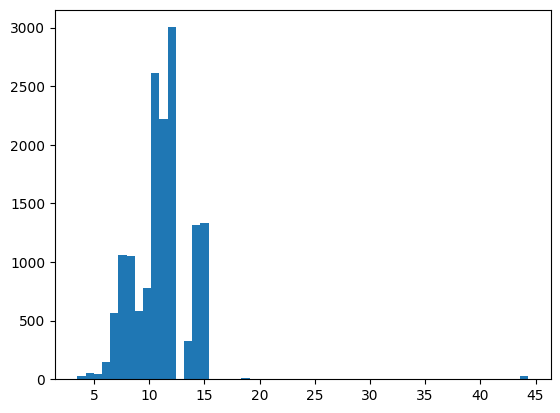

In [118]:
plt.hist(merged_avg['ds_pm_pred'], bins = 55)

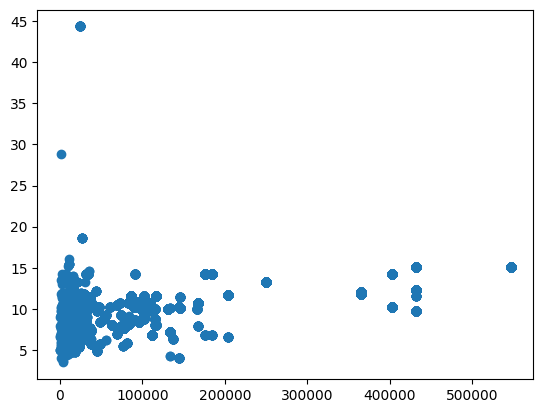

In [113]:
plt.scatter(merged_avg['Shape__Length'], merged_avg['ds_pm_pred'])

In [106]:
import statsmodels.api as sm
X = merged_avg[['frp', 'bright_t31', 'Shape__Area', 'Shape__Length']]

X = sm.add_constant(X)
X.reset_index(drop=True, inplace=True)  

y = merged_avg['ds_pm_pred']
y.reset_index(drop=True, inplace=True)  

glm_model = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.Log()))
glm_results = glm_model.fit()
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             ds_pm_pred   No. Observations:                15167
Model:                            GLM   Df Residuals:                    15162
Model Family:                   Gamma   Df Model:                            4
Link Function:                    Log   Scale:                        0.054672
Method:                          IRLS   Log-Likelihood:                -33732.
Date:                Fri, 03 May 2024   Deviance:                       613.85
Time:                        12:38:14   Pearson chi2:                     829.
No. Iterations:                    11   Pseudo R-squ. (CS):             0.2616
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.5283      0.055     45.891

In [ ]:
import statsmodels.api as sm
X = merged_avg[['frp', 'bright_t31', 'Shape__Area', 'Shape__Length']]

X = sm.add_constant(X)
X.reset_index(drop=True, inplace=True)  

y = merged_avg['ds_pm_pred']
y.reset_index(drop=True, inplace=True)  

glm_model = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.Log()))
glm_results = glm_model.fit()
print(glm_results.summary())

In [128]:
import geopandas as gpd
from shapely.geometry import Point
from scipy.spatial import cKDTree

def find_nearest_pm25(fire_row, pm25_geo, max_distance, max_time_diff):
    fire_date = fire_row['acq_date']
    fire_point = Point(fire_row['longitude_left'], fire_row['latitude_left'])

    # Filter PM2.5 data points within the time range
    mask = (pm25_geo['date_parsed'] >= fire_date - pd.Timedelta(days=max_time_diff)) & \
           (pm25_geo['date_parsed'] <= fire_date + pd.Timedelta(days=max_time_diff))
    pm25_filtered = pm25_geo.loc[mask]

    if len(pm25_filtered) == 0:
        return None

    # Create a KD-tree for efficient nearest neighbor search
    pm25_tree = cKDTree(list(zip(pm25_filtered.geometry.x, pm25_filtered.geometry.y)))

    # Find the nearest PM2.5 data point within the maximum distance
    _, idx = pm25_tree.query((fire_point.x, fire_point.y), k=1, distance_upper_bound=max_distance)

    if idx == len(pm25_filtered):
        return None

    nearest_pm25 = pm25_filtered.iloc[idx]
    return nearest_pm25


In [129]:
# Convert the wildfire dataset to a GeoDataFrame
timed_geo = gpd.GeoDataFrame(timed_df, geometry=gpd.points_from_xy(timed_df['longitude_left'], timed_df['latitude_left']))
timed_geo.crs = {'init': 'epsg:4326'}

# Convert the PM2.5 dataset to a GeoDataFrame
pm25_geo = gpd.GeoDataFrame(pm25_geo, geometry='geometry')
pm25_geo.crs = {'init': 'epsg:4326'}

# Set the maximum distance (in degrees) and time difference (in days) for matching
max_distance = 0.5
max_time_diff = 1

# Find the nearest PM2.5 data point for each wildfire
timed_geo['nearest_pm25'] = timed_geo.apply(lambda row: find_nearest_pm25(row, pm25_geo, max_distance, max_time_diff), axis=1)

/opt/homebrew/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


ValueError: Cannot set a DataFrame with multiple columns to the single column nearest_pm25

In [ ]:
# Merge the wildfire dataset with the nearest PM2.5 data points
merged_data = pd.concat([timed_geo.drop(columns=['geometry']), timed_geo['nearest_pm25'].apply(pd.Series)], axis=1)

print(merged_data)